# Loading data


In [ ]:
import matplotlib.pyplot as plt

from typing import List
from operator import itemgetter

from darts import TimeSeries

In [ ]:
%run feature_engineering.ipynb
subseries: List[TimeSeries] = subseries  # type: ignore # noqa: F821

- Splitting into continuous timeseries

Given the gaps in the datat, we will work with a list of `TimeSeries`. This will require all transformations to be applied to each subseries. 

Total number of usable samples 6768


(Text(0, 0.5, 'Flow [...]'), Text(0, 0.5, 'Acc. Precip. [...]'))

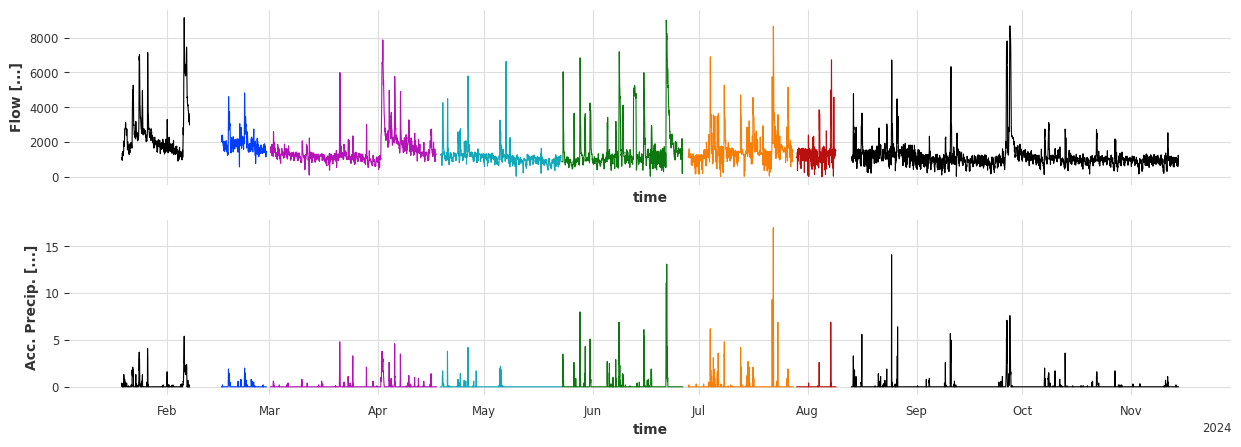

In [ ]:
print(f"Total number of usable samples {sum([len(s) for s in subseries])}")
fig, axes = plt.subplots(2, 1, figsize=(15, 5), sharex=True)
for s in subseries:
    s["flow"].plot(ax=axes[0], linewidth=0.8)
    s["acc_precip"].plot(ax=axes[1], linewidth=0.8)
axes[0].legend().set_visible(False), axes[1].legend().set_visible(False)
axes[0].set_ylabel("Flow [...]"), axes[1].set_ylabel("Acc. Precip. [...]")

In [6]:
n_subseries = len(subseries)

train_index = list(range(0, 2)) + list(range(3, n_subseries))
test_index = [2]

assert len(set(test_index).intersection(train_index)) == 0

train_getter = itemgetter(*train_index)
test_getter = itemgetter(*test_index)